<a href="https://colab.research.google.com/github/kojeda603/ciencia_datos_2025/blob/main/anailisis_LOL_Ciencia_de_datos_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import json
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import trim_mean

In [ ]:
DATAID=requests.get('https://americas.api.riotgames.com/riot/account/v1/accounts/by-riot-id/Elput4sPNG/LAN?api_key=RGAPI-41a2cfbb-1a45-4551-bba4-a545df18006e').json()

In [ ]:
print(DATAID)

{'puuid': 'gCCLqy5jl5nqJ5eyHlOZHcEMtMFiMTRV5bNmXegPj78g3pgT0XaoPjsTYdPXfrxhywDZZmljy52DNw', 'gameName': 'Elput4sPNG', 'tagLine': 'LAN'}


In [ ]:
PUUID=DATAID['puuid']
print(PUUID)

gCCLqy5jl5nqJ5eyHlOZHcEMtMFiMTRV5bNmXegPj78g3pgT0XaoPjsTYdPXfrxhywDZZmljy52DNw


In [ ]:
matchfinder='https://americas.api.riotgames.com/lol/match/v5/matches/by-puuid/gCCLqy5jl5nqJ5eyHlOZHcEMtMFiMTRV5bNmXegPj78g3pgT0XaoPjsTYdPXfrxhywDZZmljy52DNw/ids?type=ranked&start=0&count=100&api_key=RGAPI-41a2cfbb-1a45-4551-bba4-a545df18006e'

In [ ]:
player_match_100= requests.get(matchfinder).json()

In [ ]:
Dictionary={}
for x in player_match_100:
  match_data=f'https://americas.api.riotgames.com/lol/match/v5/matches/{x}?api_key=RGAPI-41a2cfbb-1a45-4551-bba4-a545df18006e'
  match_requester=requests.get(match_data).json()
  Dictionary[x]=match_requester

In [ ]:
json_file= json.dumps(Dictionary, indent=4)
with open('match_data.json', 'w') as outfile:
  outfile.write(json_file)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
with open("/content/drive/MyDrive/match_data.json", "r") as f:
    data = json.load(f)
#agregar farm,minutos de partida
# Extraer info de jugadores
partidas_data = []
for match_id, match in data.items():
    game_creation = match["info"]["gameCreation"]

    for p in match["info"]["participants"]:
        partidas_data.append({
            "gameId": match_id,
            "gameCreation": pd.to_datetime(game_creation, unit="ms"),
            "riotIdGameName": p.get("riotIdGameName"),
            "championName": p.get("championName"),
            "kills": p.get("kills"),
            "deaths": p.get("deaths"),
            "assists": p.get("assists"),
            "totalDamageDealtToChampions": p.get("totalDamageDealtToChampions"),
            "goldEarned": p.get("goldEarned"),
            "win": p.get("win"),
            "teamId": p.get("teamId"),
            "lane": p.get("lane"),
            "role": p.get("role"),
            "teamPosition": p.get("teamPosition"),
        })

# Convertir a DataFrame
df_partidas = pd.DataFrame(partidas_data)

print(df_partidas.head())


           gameId            gameCreation  riotIdGameName  championName  \
0  LA1_1637649435 2025-07-28 18:47:09.111    XxPERCIBALxX  Heimerdinger   
1  LA1_1637649435 2025-07-28 18:47:09.111          Laozen       Warwick   
2  LA1_1637649435 2025-07-28 18:47:09.111      Elput4sPNG        Veigar   
3  LA1_1637649435 2025-07-28 18:47:09.111        HALFSTER   MissFortune   
4  LA1_1637649435 2025-07-28 18:47:09.111  KProject Blink        Velkoz   

   kills  deaths  assists  totalDamageDealtToChampions  goldEarned    win  \
0      4      10       25                        55719       16263  False   
1     16      17       13                        42488       19210  False   
2     13      11       11                        59092       19645  False   
3     13       9       17                        47155       19529  False   
4      4      20       14                        37321       13309  False   

   teamId    lane     role teamPosition  
0     100  JUNGLE     NONE          TOP  
1 

In [ ]:
df_partidas["gameCreation"] = pd.to_datetime(df_partidas["gameCreation"], unit="ms")

# solo la fecha (sin hora)
df_partidas["fecha"] = df_partidas["gameCreation"].dt.date

In [ ]:
df_partidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   gameId                       1000 non-null   object        
 1   gameCreation                 1000 non-null   datetime64[ns]
 2   riotIdGameName               1000 non-null   object        
 3   championName                 1000 non-null   object        
 4   kills                        1000 non-null   int64         
 5   deaths                       1000 non-null   int64         
 6   assists                      1000 non-null   int64         
 7   totalDamageDealtToChampions  1000 non-null   int64         
 8   goldEarned                   1000 non-null   int64         
 9   win                          1000 non-null   bool          
 10  teamId                       1000 non-null   int64         
 11  lane                         1000 non-null  

In [ ]:
df_partidas["KDA"] = (df_partidas["kills"] + df_partidas["assists"]) / df_partidas["deaths"].replace(0, 1)

In [ ]:
jugador = "Elput4sPNG"
harry = df_partidas[df_partidas["riotIdGameName"] == jugador]

kda_promedio = harry["KDA"].mean()
print(f"KDA promedio de {jugador}: {kda_promedio:.2f}")

#Comparar promedio

KDA promedio de Elput4sPNG: 2.49


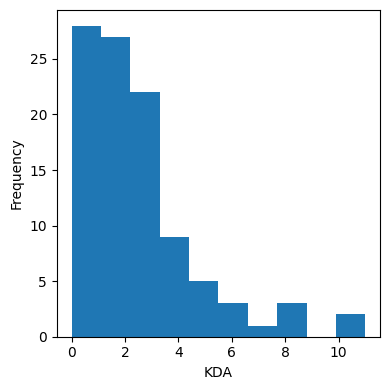

In [ ]:
ax=(harry["KDA"]).plot.hist(figsize=(4,4))
ax.set_xlabel("KDA")
plt.tight_layout()
plt.show()

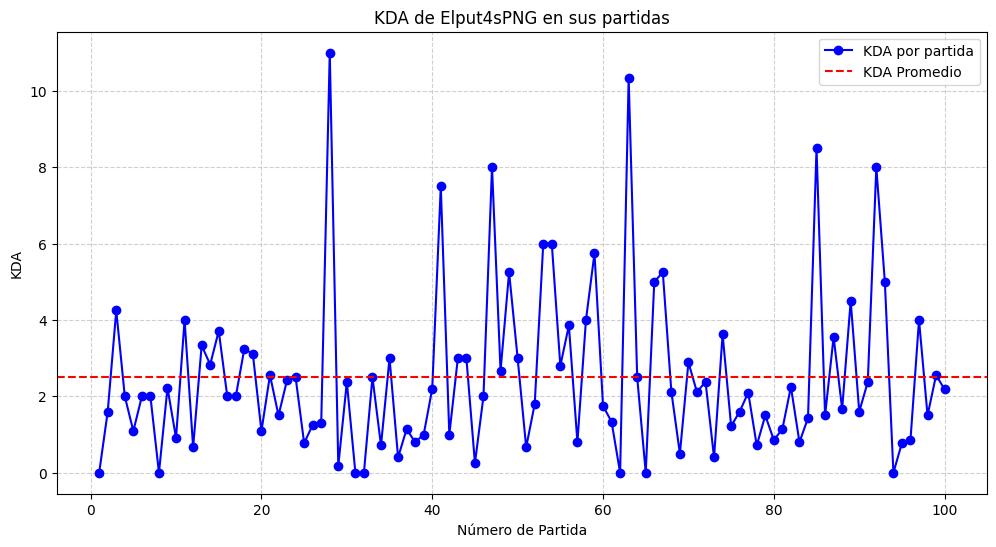

In [ ]:
jugador = "Elput4sPNG"
harry = df_partidas[df_partidas["riotIdGameName"] == jugador].copy()

# Calcular KDA
harry["KDA"] = (harry["kills"] + harry["assists"]) / harry["deaths"].replace(0, 1)

# Ordenar partidas por fecha
harry = harry.sort_values("gameCreation").reset_index(drop=True)

# Graficar
plt.figure(figsize=(12,6))
plt.plot(harry.index + 1, harry["KDA"], marker="o", linestyle="-", color="blue", label="KDA por partida")

# Agregar línea de KDA promedio
plt.axhline(harry["KDA"].mean(), color="red", linestyle="--", label="KDA Promedio")

plt.title(f"KDA de {jugador} en sus partidas")
plt.xlabel("Número de Partida")
plt.ylabel("KDA")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [ ]:
df_partidas["KDA"] = (df_partidas["kills"] + df_partidas["assists"]) / df_partidas["deaths"].replace(0, 1)

# Filtrar partidas del jugador y KDA > 2.49
filtro = df_partidas[
    (df_partidas["riotIdGameName"] == "Elput4sPNG") &
    (df_partidas["KDA"] > 2.49)
]

# Mostrar columnas relevantes
resultado = filtro[["riotIdGameName", "championName", "KDA", "lane", "role", "teamPosition"]]

print(resultado)

    riotIdGameName  championName        KDA    lane     role teamPosition
10      Elput4sPNG         Galio   2.555556     TOP     SOLO          TOP
32      Elput4sPNG         Annie   4.000000    NONE  SUPPORT       MIDDLE
72      Elput4sPNG        Veigar   5.000000  MIDDLE     SOLO       MIDDLE
82      Elput4sPNG        Veigar   8.000000  MIDDLE  SUPPORT       MIDDLE
111     Elput4sPNG        Rammus   4.500000  JUNGLE     NONE       JUNGLE
132     Elput4sPNG        Aurora   3.555556  MIDDLE     SOLO       MIDDLE
151     Elput4sPNG        Rammus   8.500000  JUNGLE     NONE       JUNGLE
262     Elput4sPNG   AurelionSol   3.625000  MIDDLE     SOLO       MIDDLE
302     Elput4sPNG   AurelionSol   2.888889     TOP      DUO       MIDDLE
336     Elput4sPNG          Ekko   5.250000  JUNGLE     NONE       JUNGLE
342     Elput4sPNG   AurelionSol   5.000000    NONE      DUO       MIDDLE
367     Elput4sPNG   AurelionSol   2.500000  MIDDLE     SOLO       MIDDLE
377     Elput4sPNG   AurelionSol  10.3

In [ ]:
trim_mean(harry["KDA"],0.1)

np.float64(2.1530977355977354)

In [ ]:
harry["KDA"].median()

2.0

In [ ]:
promedios = (
    harry
    .groupby("teamPosition")
    .agg(KDA_promedio=("KDA", "mean"),Partidas=("KDA", "count"))
    .reset_index()
    .sort_values(by="KDA_promedio", ascending=True)
)
promedios


,teamPosition,KDA_promedio,Partidas
0,,0.000000,2
1,BOTTOM,1.138889,2
5,UTILITY,1.667388,6
4,TOP,2.200275,19
3,MIDDLE,2.585781,63
2,JUNGLE,4.052679,8


In [ ]:
promedios = (
    harry
    .groupby("championName")
    .agg(
        KDA_promedio=("KDA", "mean"),
        Partidas=("KDA", "count"),
        Victorias=("win", "sum")   # la usamos solo para calcular %
    )
    .reset_index()
)

# Crear porcentaje de victorias
promedios["Porcentaje_Victorias"] = (
    promedios["Victorias"] / promedios["Partidas"] * 100
)

# Eliminar columna de Victorias
promedios = promedios.drop(columns="Victorias")

# Ordenar por KDA promedio
promedios = promedios.sort_values(by="Partidas", ascending=True)

promedios


,championName,KDA_promedio,Partidas,Porcentaje_Victorias
0,Akshan,0.714286,1,0.000000
3,Aurora,3.555556,1,100.000000
5,Briar,2.800000,1,100.000000
4,Blitzcrank,1.428571,1,0.000000
6,Caitlyn,0.777778,1,0.000000
11,Jax,2.250000,1,0.000000
9,Fizz,2.555556,1,0.000000
8,FiddleSticks,3.000000,1,100.000000
15,Nunu,0.800000,1,0.000000
14,Malphite,0.666667,1,0.000000


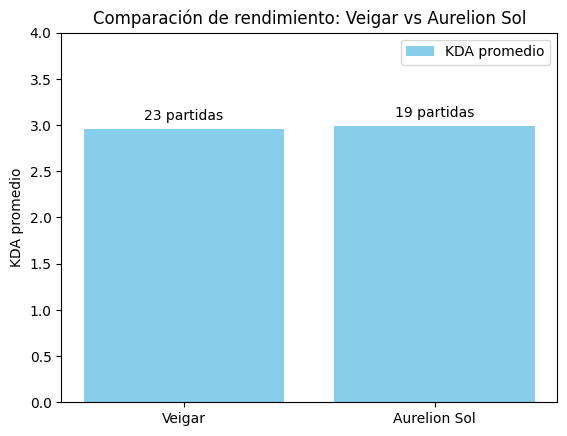

In [ ]:
import matplotlib.pyplot as plt

campeones = ["Veigar", "Aurelion Sol"]
kda = [2.96, 2.99]
partidas = [23, 19]

fig, ax1 = plt.subplots()

# Barras para KDA
ax1.bar(campeones, kda, color="skyblue", label="KDA promedio")
ax1.set_ylabel("KDA promedio")
ax1.set_ylim(0, 4)

# Mostrar número de partidas arriba de las barras
for i, p in enumerate(partidas):
    ax1.text(i, kda[i] + 0.1, f"{p} partidas", ha="center")

plt.title("Comparación de rendimiento: Veigar vs Aurelion Sol")
plt.legend()
plt.show()

In [ ]:
# --- Filtrar solo Veigar y Aurelion Sol ---
subset = harry[harry["championName"].isin(["Veigar", "AurelionSol"])].copy()

# Normalizar la columna 'win'
subset["win_bin"] = (
    subset["win"].astype(str).str.lower()
    .map({"true":1, "false":0, "1":1, "0":0, "win":1, "loss":0})
    .fillna(0).astype(int)
)

# --- Resumen general ---
resumen = (
    subset.groupby("championName")
    .agg(
        Partidas=("gameId", "count"),
        Winrate=("win_bin", "mean"),
        KDA_promedio=("KDA", "mean"),
        KDA_mediana=("KDA", "median"),
        Kills_prom=("kills", "mean"),
        Deaths_prom=("deaths", "mean"),
        Assists_prom=("assists", "mean"),
        Daño_prom=("totalDamageDealtToChampions", "mean"),
        Oro_prom=("goldEarned", "mean"),
    )
)

# Convertir winrate a %
resumen["Winrate"] = (resumen["Winrate"] * 100).round(1)

# Redondear otras métricas
resumen = resumen.round({
    "KDA_promedio": 2, "KDA_mediana": 2,
    "Kills_prom": 2, "Deaths_prom": 2, "Assists_prom": 2,
    "Daño_prom": 0, "Oro_prom": 0
})

display(resumen)


,Partidas,Winrate,KDA_promedio,KDA_mediana,Kills_prom,Deaths_prom,Assists_prom,Daño_prom,Oro_prom
championName,,,,,,,,,
AurelionSol,19,63.2,2.99,2.5,8.53,5.68,6.21,30766.0,14074.0
Veigar,23,60.9,2.96,2.0,10.70,7.48,6.78,40308.0,16107.0


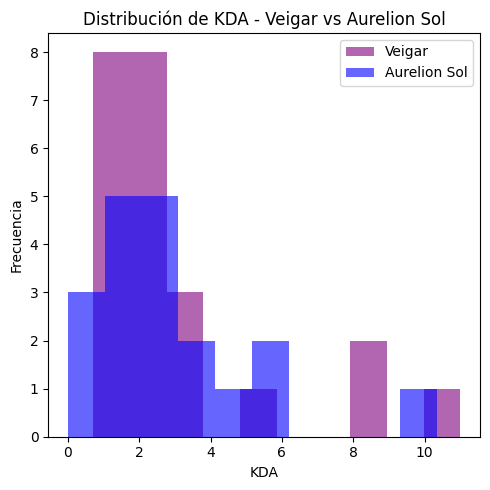

In [ ]:
plt.figure(figsize=(5,5))
plt.hist(
    harry[harry["championName"]=="Veigar"]["KDA"],
    bins=10, alpha=0.6, color="purple", label="Veigar"
)
plt.hist(
    harry[harry["championName"]=="AurelionSol"]["KDA"],
    bins=10, alpha=0.6, color="blue", label="Aurelion Sol"
)

plt.xlabel("KDA")
plt.ylabel("Frecuencia")
plt.title("Distribución de KDA - Veigar vs Aurelion Sol")  # 👈 título
plt.legend()
plt.tight_layout()
plt.show()


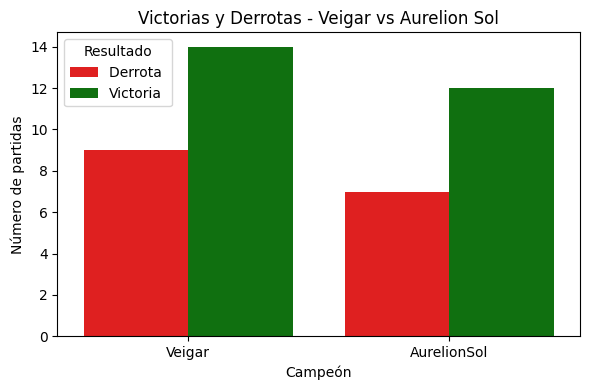

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Crear win_bin si no existe
if "win_bin" not in harry.columns and "win" in harry.columns:
    harry["win_bin"] = harry["win"].astype(int)

# 2. Filtrar Veigar y AurelionSol
focus = harry[harry["championName"].isin(["Veigar","AurelionSol"])]

# 3. Gráfico de victorias/derrotas
plt.figure(figsize=(6,4))
sns.countplot(data=focus, x="championName", hue="win_bin", palette=["red","green"])

plt.xlabel("Campeón")
plt.ylabel("Número de partidas")
plt.title("Victorias y Derrotas - Veigar vs Aurelion Sol")
plt.legend(title="Resultado", labels=["Derrota ", "Victoria"])
plt.tight_layout()
plt.show()


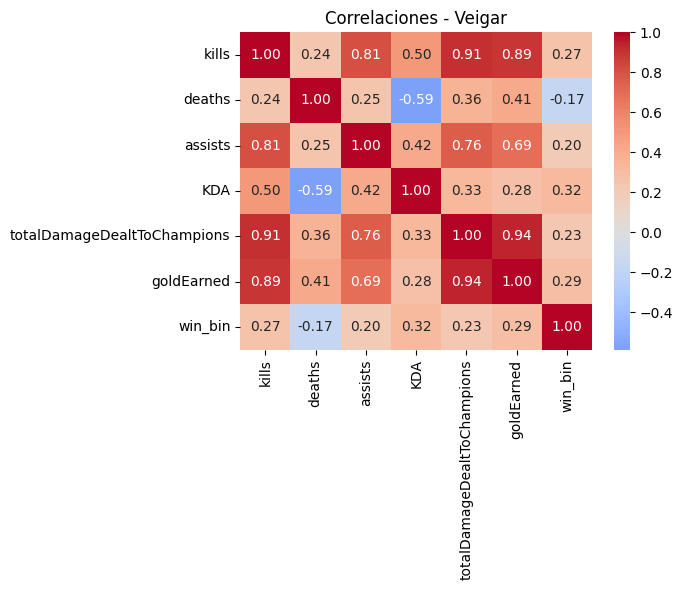

In [ ]:
# Variables de interés
vars_corr = ["kills", "deaths", "assists", "KDA",
             "totalDamageDealtToChampions", "goldEarned", "win_bin"]

# Correlaciones de Veigar
veigar_corr = subset[subset["championName"]=="Veigar"][vars_corr].corr()

# Heatmap Veigar
plt.figure(figsize=(7,6))
sns.heatmap(veigar_corr, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlaciones - Veigar")
plt.tight_layout()
plt.show()


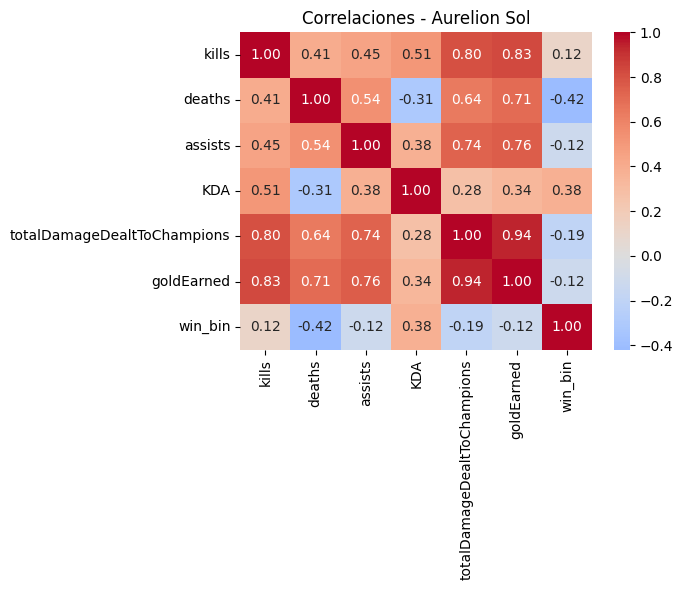

In [ ]:
# Correlaciones de Aurelion Sol
aurelion_corr = subset[subset["championName"]=="AurelionSol"][vars_corr].corr()

# Heatmap Aurelion Sol
plt.figure(figsize=(7,6))
sns.heatmap(aurelion_corr, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlaciones - Aurelion Sol")
plt.tight_layout()
plt.show()


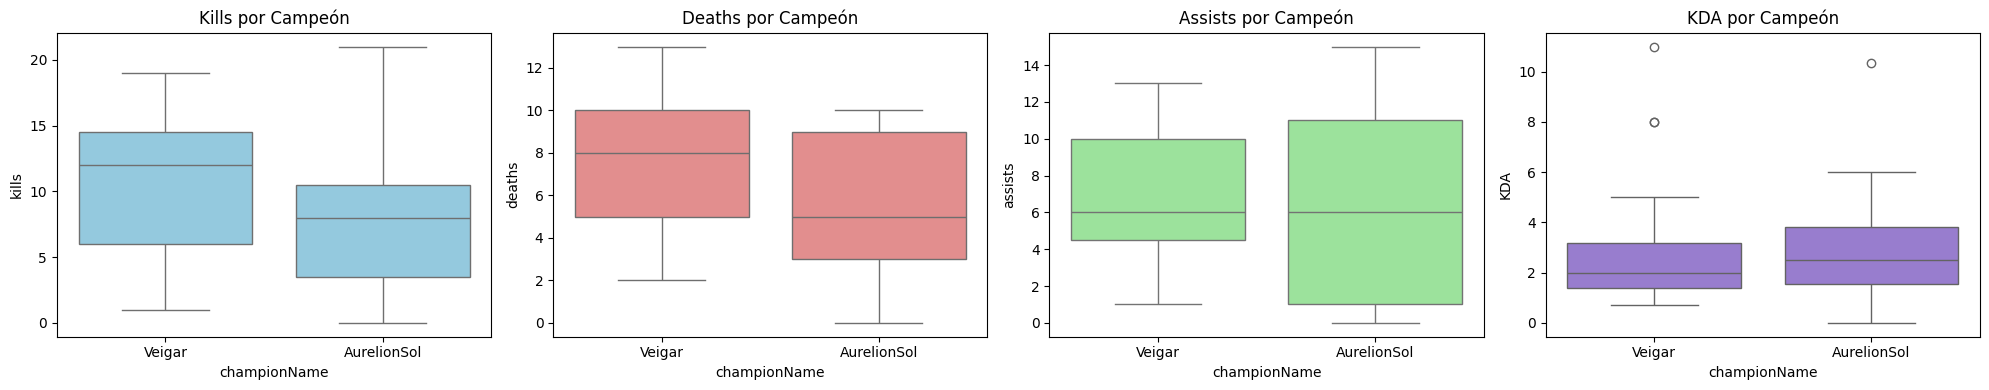

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(20,4))  # 4 boxplots en una fila

# Boxplot de Kills
sns.boxplot(data=subset, x="championName", y="kills", ax=axes[0], color="skyblue")
axes[0].set_title("Kills por Campeón")

# Boxplot de Deaths
sns.boxplot(data=subset, x="championName", y="deaths", ax=axes[1], color="lightcoral")
axes[1].set_title("Deaths por Campeón")

# Boxplot de Assists
sns.boxplot(data=subset, x="championName", y="assists", ax=axes[2], color="lightgreen")
axes[2].set_title("Assists por Campeón")

# Boxplot de KDA
sns.boxplot(data=subset, x="championName", y="KDA", ax=axes[3], color="mediumpurple")
axes[3].set_title("KDA por Campeón")

plt.tight_layout()
plt.show()



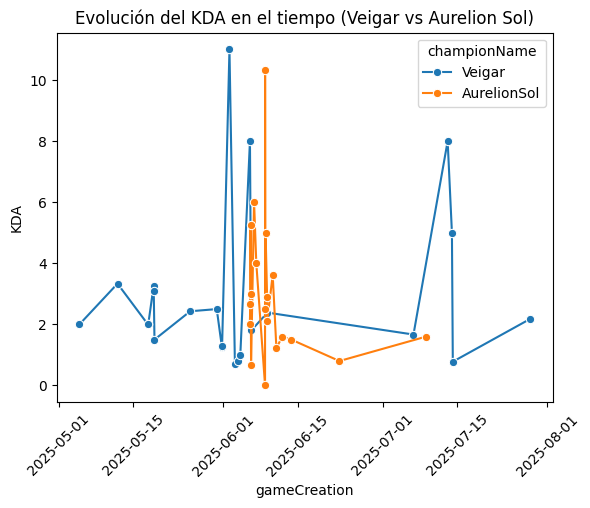

In [ ]:
# Filtrar solo los campeones de interés
subset_focus = subset[subset["championName"].isin(["Veigar","AurelionSol"])]

# Gráfico línea
sns.lineplot(data=subset_focus, x="gameCreation", y="KDA", hue="championName", marker="o")
plt.title("Evolución del KDA en el tiempo (Veigar vs Aurelion Sol)")
plt.xticks(rotation=45)
plt.show()


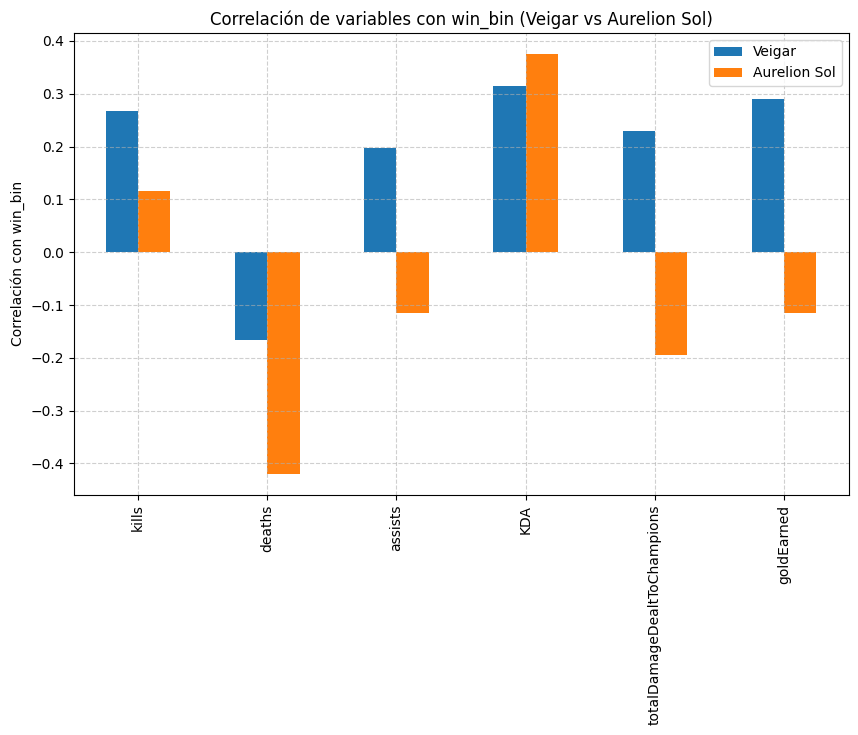

In [ ]:
# Extraer correlaciones con win_bin
veigar_win_corr = veigar_corr["win_bin"].drop("win_bin")
aurelion_win_corr = aurelion_corr["win_bin"].drop("win_bin")

# Juntar en un DataFrame para comparación
comparacion = pd.DataFrame({
    "Veigar": veigar_win_corr,
    "Aurelion Sol": aurelion_win_corr
})

# Gráfico comparativo
comparacion.plot(kind="bar", figsize=(10,6))
plt.title("Correlación de variables con win_bin (Veigar vs Aurelion Sol)")
plt.ylabel("Correlación con win_bin")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


In [ ]:
# Total de partidas
total_partidas = len(harry)

# Total de victorias
victorias = harry["win"].sum()

# Winrate global
winrate_global = victorias / total_partidas * 100

print(f"De {total_partidas} partidas en total, hubo {victorias} victorias "
      f"({winrate_global:.2f}% de winrate global).")


De 100 partidas en total, hubo 50 victorias (50.00% de winrate global).


In [ ]:
# 1. Identificar campeones con menos de 5 partidas
conteo = harry.groupby("championName").size().reset_index(name="Partidas")
campeones_menos5 = conteo[conteo["Partidas"] < 10]["championName"]

# 2. Filtrar esas partidas en el dataset original
partidas_menos10 = harry[harry["championName"].isin(campeones_menos5)]

# 3. Calcular métricas
total_partidas = len(harry)  # en tu caso son 100
partidas_menos5_count = len(partidas_menos10)
victorias_menos5 = partidas_menos10["win"].sum()
winrate_menos5 = victorias_menos5 / partidas_menos5_count * 100

# 4. Resultado final
print(f"La cantidad de partidas jugadas con campeones menores a 10 partidas es "
      f"{partidas_menos5_count} de {total_partidas} partidas, "
      f"y el porcentaje de victoria es de {winrate_menos5:.2f}%")


La cantidad de partidas jugadas con campeones menores a 10 partidas es 58 de 100 partidas, y el porcentaje de victoria es de 41.38%


In [ ]:
# 1. Filtrar solo Veigar y AurelionSol
partidas_focus = harry[harry["championName"].isin(["Veigar", "AurelionSol"])]

# 2. Calcular métricas
total_partidas = len(harry)  # total general (ej: 100)
partidas_focus_count = len(partidas_focus)
victorias_focus = partidas_focus["win"].sum()
winrate_focus = victorias_focus / partidas_focus_count * 100

# 3. Resultado final
print(f"La cantidad de partidas jugadas con Veigar y AurelionSol es "
      f"{partidas_focus_count} de {total_partidas} partidas, "
      f"y el porcentaje de victoria es de {winrate_focus:.2f}%")


La cantidad de partidas jugadas con Veigar y AurelionSol es 42 de 100 partidas, y el porcentaje de victoria es de 61.90%
